#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plt
import plotly.express as plt

# Load your dataset
df = pd.read_csv('Salaries (1).csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [3]:


No_Rows = df.shape[0]
No_Rows

148654

In [4]:

No_Columns= df.shape[1]
No_Columns

13

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
pd.isna(df).sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [7]:
df["TotalPayBenefits"].describe()

count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.


        1- for columns (Notes and status we will delete te whole column , all values are missing , no need to fill it maybe effect on the analysis .
        2- for columns (Benefits,BasePay) wewill fill with average to make the values near .

In [8]:
df.drop(["Status","Notes"],axis=1,inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [9]:

df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [24]:
df["Benefits"].fillna(value=df["Benefits"].mean(), inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.000000,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,25007.893151,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,25007.893151,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,25007.893151,0.00,0.00,2014,San Francisco


In [28]:

df["BasePay"].fillna(value=df["BasePay"].mean(), inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18000,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02000,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13000,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00000,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60000,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00000,0.00,0.00,0.000000,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,66325.44884,NaN,NaN,25007.893151,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,66325.44884,NaN,NaN,25007.893151,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,66325.44884,NaN,NaN,25007.893151,0.00,0.00,2014,San Francisco


4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

<Axes: ylabel='Count'>

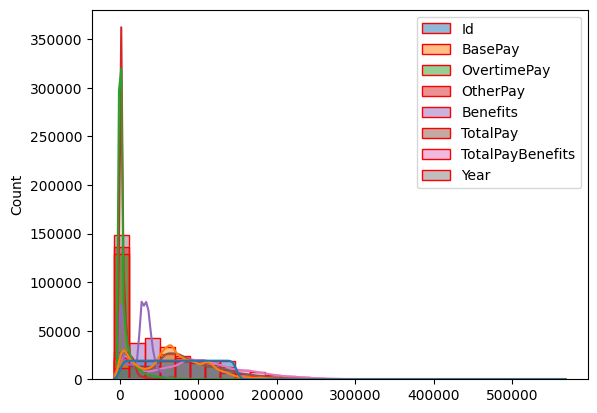

In [10]:
sns.histplot(df, bins=30, kde=True, color='lightgreen', edgecolor='red')

Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [11]:
df.groupby("JobTitle").describe()

Id                 \
                                                count           mean   
JobTitle                                                               
ACCOUNT CLERK                                    83.0   25734.819277   
ACCOUNTANT                                        5.0   24159.200000   
ACCOUNTANT INTERN                                48.0   28128.833333   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  135284.000000   
ACUPUNCTURIST                                     1.0   18379.000000   
...                                               ...            ...   
X-RAY LABORATORY AIDE                            26.0   22502.076923   
X-Ray Laboratory Aide                           100.0   98890.620000   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0   23392.000000   
Youth Comm Advisor                                4.0   99677.750000   
ZOO CURATOR                                       1.0   18779.000000   

                                                                        \
                                                         std       min   
JobTitle                                                                 
ACCOUNT CLERK                                    2621.592874   20766.0   
ACCOUNTANT                                       6787.702608   19264.0   
ACCOUNTANT INTERN                                3941.782388   21536.0   
ACPO,JuvP, Juv Prob (SFERS)                              NaN  135284.0   
ACUPUNCTURIST                                            NaN   18379.0   
...                                                      ...       ...   
X-RAY LABORATORY AIDE                            4694.321369   12940.0   
X-Ray Laboratory Aide                           31404.565120   49777.0   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS           NaN   23392.0   
Youth Comm Advisor                              32595.496267   58843.0   
ZOO CURATOR                                              NaN   18779.0   

                                                                     \
                                                      25%       50%   
JobTitle                                                              
ACCOUNT CLERK                                    24581.00   24774.0   
ACCOUNTANT                                       19325.00   20993.0   
ACCOUNTANT INTERN                                23325.75   29979.5   
ACPO,JuvP, Juv Prob (SFERS)                     135284.00  135284.0   
ACUPUNCTURIST                                    18379.00   18379.0   
...                                                   ...       ...   
X-RAY LABORATORY AIDE                            19632.75   20927.0   
X-Ray Laboratory Aide                            65829.00   98379.5   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   23392.00   23392.0   
Youth Comm Advisor                               88267.00  100704.5   
ZOO CURATOR                                      18779.00   18779.0   

                                                                    BasePay  \
                                                      75%       max   count   
JobTitle                                                                      
ACCOUNT CLERK                                    26299.50   35638.0    83.0   
ACCOUNTANT                                       25928.00   35286.0     5.0   
ACCOUNTANT INTERN                                31639.25   34267.0    48.0   
ACPO,JuvP, Juv Prob (SFERS)                     135284.00  135284.0     1.0   
ACUPUNCTURIST                                    18379.00   18379.0     1.0   
...                                                   ...       ...     ...   
X-RAY LABORATORY AIDE                            24165.75   33182.0    26.0   
X-Ray Laboratory Aide                           130540.75  143632.0   100.0   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   23392.00   23392.0     1.0   
Youth Comm Advisor                              112115.25  138

In [12]:
df.groupby("Agency").describe()

Id                                                 \
                  count     mean           std  min       25%      50%   
Agency                                                                   
San Francisco  148654.0  74327.5  42912.857795  1.0  37164.25  74327.5   

                                     BasePay               ...  \
                     75%       max     count         mean  ...   
Agency                                                     ...   
San Francisco  111490.75  148654.0  148045.0  66325.44884  ...   

              TotalPayBenefits                 Year                         \
                           75%        max     count         mean       std   
Agency                                                                       
San Francisco        132876.45  567595.43  148654.0  2012.522643  1.117538   

                                                       
                  min     25%     50%     75%     max  
Agency                                                 
San Francisco  2011.0  2012.0  2013.0  2014.0  2014.0  

[1 rows x 64 columns]

In [13]:
df.groupby("Agency").mean()

<ipython-input-13-932ca9729d57>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Agency").mean()


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Agency,,,,,,,,
San Francisco,74327.5,66325.44884,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643


In [14]:
df.groupby("JobTitle").mean()

<ipython-input-14-41c506fd09ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("JobTitle").mean()


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,,
ACCOUNT CLERK,25734.819277,43300.806506,373.200843,361.656988,NaN,44035.664337,44035.664337,2011.00
ACCOUNTANT,24159.200000,46643.172000,0.000000,786.096000,NaN,47429.268000,47429.268000,2011.00
ACCOUNTANT INTERN,28128.833333,28732.663958,24.430625,274.648333,NaN,29031.742917,29031.742917,2011.00
"ACPO,JuvP, Juv Prob (SFERS)",135284.000000,62290.780000,0.000000,0.000000,17975.5900,62290.780000,80266.370000,2014.00
ACUPUNCTURIST,18379.000000,66374.400000,0.000000,1220.000000,NaN,67594.400000,67594.400000,2011.00
...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,22502.076923,47664.773077,3571.223462,1469.883846,NaN,52705.880385,52705.880385,2011.00
X-Ray Laboratory Aide,98890.620000,46086.387100,3483.767100,1253.788500,18697.1805,50823.942700,69521.123200,2013.04
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",23392.000000,52609.910000,0.000000,1022.960000,NaN,53632.870000,53632.870000,2011.00


Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [15]:
plt.scatter(df,y="TotalPayBenefits",x="BasePay")

# Good Luck!